In [1]:
# WDQ7005 - Data Mining
# Master of Data Science | University of Malaya
# Assignment Part A: Web Crawling of Real-time Data

# Group Members:
# Azwa Kamaruddin (WQD170089)
# Kok Hon Loong (WQD170086)

In [45]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
from bs4 import BeautifulSoup

<Figure size 1440x720 with 0 Axes>

In [54]:
### =============================== ###
### CODE STRUCTURE
### =============================== ###
#
# We partitioned the code into 3 sections:
# 1. Number of CONFIRMED cases.
# 2. Number of DEATH cases.
# 3. Number of RECOVERED cases.
# For each section, we display the time series trend for ASEAN countries and China and compare between them.

In [20]:
### =============================== ###
### NO. OF CONFIRMED CASES
### =============================== ###
url_confirmed_cases = "https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"

try:
    page = requests.get(url_confirmed_cases, timeout=5)
    if page.status_code == 200:
        soup = BeautifulSoup(page.content,'html.parser')
        table = soup.find("table", {"class": "js-csv-data csv-data js-file-line-container"})
        df = pd.read_html(str(table))
    else: 
        print(str(page.status_code) + " - Error, page not found.")
except requests.ConnectionError as e:
    print('Connection error')
    print(str(e))

In [21]:
# Put the tabulated data into a dataframe and display the first 5 results:
confirmed_cases = df[0]
confirmed_cases.head()

,Unnamed: 0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
0,NaN,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,...,43,43,47,48,50,50,50,53,59,70
1,NaN,NaN,Japan,36.0000,138.0000,2,1,2,2,4,...,293,331,360,420,461,502,511,581,639,639
2,NaN,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,...,110,110,117,130,138,150,150,160,178,178
3,NaN,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,...,36,50,50,83,93,99,117,129,149,149


In [22]:
# Drop unneeded columns from the dataframe:
confirmed_cases = confirmed_cases.drop('Unnamed: 0', axis=1)
confirmed_cases = confirmed_cases.drop(['Lat','Long'], axis=1)
confirmed_cases = confirmed_cases.drop('Province/State', axis=1)

# Rename column header to simply 'Country' and set it as the index:
confirmed_cases = confirmed_cases.rename(columns={'Country/Region':'Country'})
confirmed_cases = confirmed_cases.set_index('Country')

# Display first 5 results:
confirmed_cases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
Country,,,,,,,,,,,,,,,,,,,,,
Thailand,2,3,5,7,8,8,14,14,14,19,...,43,43,47,48,50,50,50,53,59,70
Japan,2,1,2,2,4,4,7,7,11,15,...,293,331,360,420,461,502,511,581,639,639
Singapore,0,1,3,3,4,5,7,7,10,13,...,110,110,117,130,138,150,150,160,178,178
Nepal,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Malaysia,0,0,0,3,4,4,4,7,8,8,...,36,50,50,83,93,99,117,129,149,149


In [23]:
# COMMENT: From the above table we can see that the number of confirmed cases are increasing for all listed countries.

In [24]:
# Let's transpose the table and describe the data for each of the different countries:
confirmed_cases.transpose().describe()

Country,Thailand,Japan,Singapore,Nepal,Malaysia,Canada,Australia,Australia,Australia,Cambodia,...,US,US,US,US,US,US,US,US,Cuba,Guyana
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.000000,51.000000
mean,31.843137,150.568627,68.294118,0.941176,30.980392,7.843137,10.450980,5.490196,6.058824,1.039216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.019608
std,14.855804,184.410331,50.362404,0.237635,37.351032,10.354463,16.046574,4.818185,5.116295,0.564297,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.420084,0.140028
min,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,22.000000,21.000000,21.000000,1.000000,9.000000,1.000000,4.000000,4.000000,3.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
50%,34.000000,59.000000,75.000000,1.000000,22.000000,4.000000,4.000000,4.000000,5.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
75%,41.500000,234.500000,97.500000,1.000000,24.000000,7.500000,4.000000,5.500000,7.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
max,70.000000,639.000000,178.000000,1.000000,149.000000,46.000000,65.000000,21.000000,20.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,1.000000


In [25]:
# COMMENT:
# count - shows how many days of data cases are being tracked. There are 51 days since the first tracking.
# mean - shows the average number of confirmed cases during the 51 days.
# max - the total number of confirmed cases to date.

In [62]:
# Obtain only the confirmed cases for the 10 ASEAN countries + China

# Get data for ASEAN regions:
asean = ['Malaysia', 'Singapore', 'Thailand', 'Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Myanmar', 'Philippines', 'Vietnam']
confirmed_cases_asean = confirmed_cases[confirmed_cases.index.isin(asean)]
confirmed_cases_asean

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
Country,,,,,,,,,,,,,,,,,,,,,
Thailand,2,3,5,7,8,8,14,14,14,19,...,43,43,47,48,50,50,50,53,59,70
Singapore,0,1,3,3,4,5,7,7,10,13,...,110,110,117,130,138,150,150,160,178,178
Malaysia,0,0,0,3,4,4,4,7,8,8,...,36,50,50,83,93,99,117,129,149,149
Cambodia,0,0,0,0,0,1,1,1,1,1,...,1,1,1,1,1,2,2,2,3,3
Philippines,0,0,0,0,0,0,0,0,1,1,...,3,3,3,5,6,10,20,33,49,52
Indonesia,0,0,0,0,0,0,0,0,0,0,...,2,2,2,4,4,6,19,27,34,34
Brunei,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,11,11
Vietnam,0,2,2,2,2,2,2,2,2,2,...,16,16,16,16,18,30,30,31,38,39


In [63]:
# China:
confirmed_cases_china = confirmed_cases[confirmed_cases.index == 'China']
confirmed_cases_china.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
Country,,,,,,,,,,,,,,,,,,,,,
China,444,444,549,761,1058,1423,3554,3554,4903,5806,...,67217,67332,67466,67592,67666,67707,67743,67760,67773,67781
China,26,32,53,78,111,151,207,277,354,436,...,1350,1350,1351,1352,1352,1352,1352,1353,1356,1356
China,5,5,9,32,83,128,168,206,278,352,...,1272,1272,1272,1272,1272,1272,1272,1272,1273,1273
China,10,27,43,62,104,128,173,296,428,538,...,1213,1213,1215,1215,1215,1215,1215,1215,1215,1215
China,4,9,24,43,69,100,143,221,277,332,...,1018,1018,1018,1018,1018,1018,1018,1018,1018,1018


In [31]:
# For China, we combined all the different regions into a single row representing the entire China:
confirmed_cases_china_combined = confirmed_cases_china.groupby('Country').sum()
confirmed_cases_china_combined

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
Country,,,,,,,,,,,,,,,,,,,,,
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,80261,80386,80537,80690,80770,80823,80860,80887,80921,80932


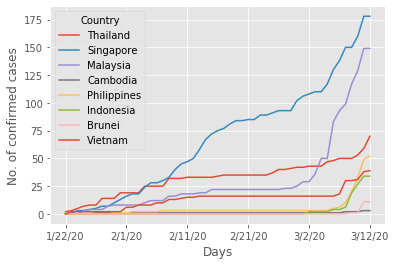

In [46]:
# Plot the number of confirmed cases over time for all ASEAN countries:

confirmed_cases_asean.T.plot()
plt.ylabel('No. of confirmed cases')
plt.xlabel('Days')
plt.show()

In [ ]:
# COMMENT: Singapore has the most number of recorded confirmed cases and are increasing exponentially.
# Malaysia is second followed by Thailand as the 3rd most recorded confirmed cases in ASEAN.

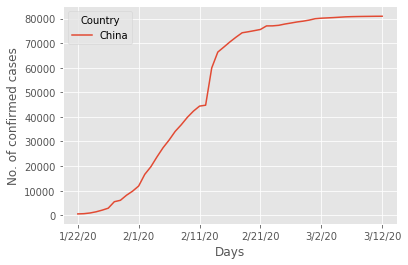

In [50]:
# Plot the number of confirmed cases over time for China:

confirmed_cases_china_combined.T.plot()
plt.ylabel('No. of confirmed cases')
plt.xlabel('Days')
plt.show()

In [51]:
# COMMENT: Confirmed cases in China continues to rise. More than 80k cases confirmed to date.

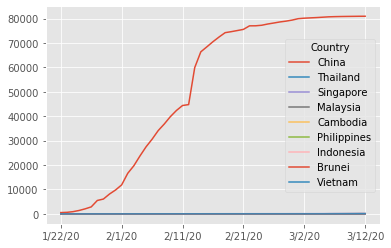

In [52]:
# Plot the number of confirmed cases over time for China vs ASEAN countries:

ax = confirmed_cases_china_combined.T.plot()
confirmed_cases_asean.T.plot(ax=ax)

In [ ]:
# COMMENT: China numbers are too huge to compare with the number of cases in ASEAN.

In [55]:
### =============================== ###
### NO. OF DEATH CASES
### =============================== ###
url_death_cases = "https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"

try:
    page = requests.get(url_death_cases, timeout=5)
    if page.status_code == 200:
        soup = BeautifulSoup(page.content,'html.parser')
        table = soup.find("table", {"class": "js-csv-data csv-data js-file-line-container"})
        df = pd.read_html(str(table))
    else: 
        print(str(page.status_code) + " - Error, page not found.")
except requests.ConnectionError as e:
    print('Connection error')
    print(str(e))

In [56]:
# Put the tabulated data into a dataframe and display the first 5 results:
death_cases = df[0]
death_cases.head()

,Unnamed: 0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
0,NaN,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,NaN,Japan,36.0000,138.0000,0,0,0,0,0,...,6,6,6,6,6,6,10,10,15,16
2,NaN,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# Drop unneeded columns from the dataframe:
death_cases = death_cases.drop('Unnamed: 0', axis=1)
death_cases = death_cases.drop(['Lat','Long'], axis=1)
death_cases = death_cases.drop('Province/State', axis=1)

# Rename column header to simply 'Country' and set it as the index:
death_cases = death_cases.rename(columns={'Country/Region':'Country'})
death_cases = death_cases.set_index('Country')

# Display first 5 results:
death_cases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
Country,,,,,,,,,,,,,,,,,,,,,
Thailand,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Japan,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,10,10,15,16
Singapore,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Nepal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Malaysia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# Transpose the table and describe the data for each of the different countries:
death_cases.transpose().describe()

Country,Thailand,Japan,Singapore,Nepal,Malaysia,Canada,Australia,Australia,Australia,Cambodia,...,US,US,US,US,US,US,US,US,Cuba,Guyana
count,51.000000,51.000000,51.0,51.0,51.0,51.000000,51.000000,51.0,51.0,51.0,...,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.000000
mean,0.235294,2.490196,0.0,0.0,0.0,0.078431,0.274510,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019608
std,0.428403,3.812467,0.0,0.0,0.0,0.271524,0.634931,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.140028
min,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,0.000000,4.500000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,1.000000,16.000000,0.0,0.0,0.0,1.000000,2.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


In [ ]:
# COMMENT:
# count - shows how many days of data cases are being tracked. There are 51 days since the first tracking.
# mean - shows the average number of death cases during the 51 days.
# max - the total number of death cases to date.

In [64]:
# Obtain only the death cases for the 10 ASEAN countries + China

# Get data for ASEAN regions:
asean = ['Malaysia', 'Singapore', 'Thailand', 'Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Myanmar', 'Philippines', 'Vietnam']
death_cases_asean = death_cases[death_cases.index.isin(asean)]
death_cases_asean

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
Country,,,,,,,,,,,,,,,,,,,,,
Thailand,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Singapore,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Malaysia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cambodia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Philippines,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,2
Indonesia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
Brunei,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Vietnam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# China:
death_cases_china = death_cases[death_cases.index == 'China']
death_cases_china.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
Country,,,,,,,,,,,,,,,,,,,,,
China,17,17,24,40,52,76,125,125,162,204,...,2835,2871,2902,2931,2959,2986,3008,3024,3046,3056
China,0,0,0,0,0,0,0,0,0,0,...,7,7,7,7,7,7,8,8,8,8
China,0,0,0,0,1,1,1,2,2,2,...,22,22,22,22,22,22,22,22,22,22
China,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
China,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [66]:
# For China, we combined all the different regions into a single row representing the entire China:
death_cases_china_combined = death_cases_china.groupby('Country').sum()
death_cases_china_combined

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
Country,,,,,,,,,,,,,,,,,,,,,
China,17,18,26,42,56,82,131,133,171,213,...,2947,2983,3015,3044,3072,3100,3123,3139,3161,3172


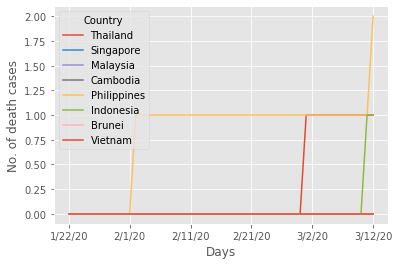

In [67]:
# Plot the number of death cases over time for all ASEAN countries:

death_cases_asean.T.plot()
plt.ylabel('No. of death cases')
plt.xlabel('Days')
plt.show()

In [68]:
# COMMENT: The number of deaths from the covid-19 is rare/low in the ASEAN region.
# Only 4 patients have died: 2 from Phillipines, 1 from Thailand, and 1 from Indonesia.

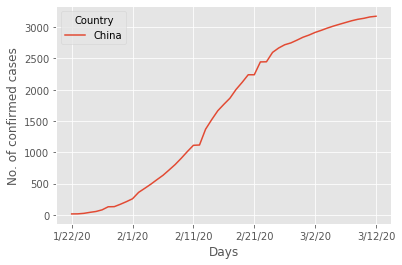

In [69]:
# Plot the number of death cases over time for China:

death_cases_china_combined.T.plot()
plt.ylabel('No. of confirmed cases')
plt.xlabel('Days')
plt.show()

In [ ]:
# COMMENT: The number of death cases in China has risen to more than 3k cases.

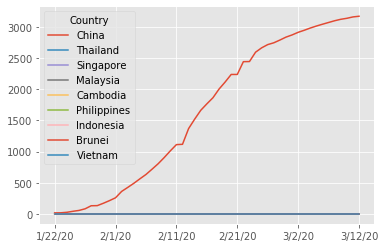

In [70]:
# Plot the number of death cases over time for China vs ASEAN countries:

ax = death_cases_china_combined.T.plot()
death_cases_asean.T.plot(ax=ax)

In [ ]:
# COMMENT: Deaths in ASEAN countries due to covid-19 is rare or low compared to China.

In [71]:
### =============================== ###
### NO. OF RECOVERED CASES
### =============================== ###
url_recovered_cases = "https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"

try:
    page = requests.get(url_recovered_cases, timeout=5)
    if page.status_code == 200:
        soup = BeautifulSoup(page.content,'html.parser')
        table = soup.find("table", {"class": "js-csv-data csv-data js-file-line-container"})
        df = pd.read_html(str(table))
    else: 
        print(str(page.status_code) + " - Error, page not found.")
except requests.ConnectionError as e:
    print('Connection error')
    print(str(e))

In [72]:
 # Put the tabulated data into a dataframe and display the first 5 results:
recovered_cases = df[0]
recovered_cases.head()

,Unnamed: 0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
0,NaN,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,...,31,31,31,31,31,31,31,33,34,34
1,NaN,NaN,Japan,36.0000,138.0000,0,0,0,0,1,...,43,43,43,46,76,76,76,101,118,118
2,NaN,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,...,78,78,78,78,78,78,78,78,96,96
3,NaN,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,...,22,22,22,22,23,24,24,24,26,26


In [73]:
# Drop unneeded columns from the dataframe:
recovered_cases = recovered_cases.drop('Unnamed: 0', axis=1)
recovered_cases = recovered_cases.drop(['Lat','Long'], axis=1)
recovered_cases = recovered_cases.drop('Province/State', axis=1)

In [74]:
# Rename column header to simply 'Country' and set it as the index:
recovered_cases = recovered_cases.rename(columns={'Country/Region':'Country'})
recovered_cases = recovered_cases.set_index('Country')

In [75]:
# Display first 5 results:
recovered_cases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
Country,,,,,,,,,,,,,,,,,,,,,
Thailand,0,0,0,0,2,2,5,5,5,5,...,31,31,31,31,31,31,31,33,34,34
Japan,0,0,0,0,1,1,1,1,1,1,...,43,43,43,46,76,76,76,101,118,118
Singapore,0,0,0,0,0,0,0,0,0,0,...,78,78,78,78,78,78,78,78,96,96
Nepal,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Malaysia,0,0,0,0,0,0,0,0,0,0,...,22,22,22,22,23,24,24,24,26,26


In [76]:
# Transpose the table and describe the data for each of the different countries:
recovered_cases.transpose().describe()

Country,Thailand,Japan,Singapore,Nepal,Malaysia,Canada,Australia,Australia,Australia,Cambodia,...,US,US,US,US,US,US,US,US,Cuba,Guyana
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0
mean,15.568627,22.588235,32.784314,0.588235,9.882353,1.000000,2.823529,2.745098,1.509804,0.588235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,11.227208,30.188194,33.535243,0.497050,9.630466,1.587451,1.506066,2.621779,2.859179,0.497050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,14.000000,12.000000,18.000000,1.000000,7.000000,0.000000,4.000000,4.000000,0.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,28.000000,27.000000,67.000000,1.000000,18.000000,3.000000,4.000000,4.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,34.000000,118.000000,96.000000,1.000000,26.000000,4.000000,4.000000,7.000000,8.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
# COMMENT:
# count - shows how many days of data cases are being tracked. There are 51 days since the first tracking.
# mean - shows the average number of recovered cases during the 51 days.
# max - the total number of recovered cases to date.

In [78]:
# Obtain only the recovered cases for the 10 ASEAN countries + China

# Get data for ASEAN regions:
asean = ['Malaysia', 'Singapore', 'Thailand', 'Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Myanmar', 'Philippines', 'Vietnam']
recovered_cases_asean = recovered_cases[recovered_cases.index.isin(asean)]
recovered_cases_asean

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
Country,,,,,,,,,,,,,,,,,,,,,
Thailand,0,0,0,0,2,2,5,5,5,5,...,31,31,31,31,31,31,31,33,34,34
Singapore,0,0,0,0,0,0,0,0,0,0,...,78,78,78,78,78,78,78,78,96,96
Malaysia,0,0,0,0,0,0,0,0,0,0,...,22,22,22,22,23,24,24,24,26,26
Cambodia,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Philippines,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,2,2,2
Indonesia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2
Brunei,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Vietnam,0,0,0,0,0,0,0,0,0,0,...,16,16,16,16,16,16,16,16,16,16


In [79]:
# China:
recovered_cases_china = recovered_cases[recovered_cases.index == 'China']
recovered_cases_china.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
Country,,,,,,,,,,,,,,,,,,,,,
China,28,28,31,32,42,45,80,88,90,141,...,36208,38557,40592,42033,43500,45235,46488,47743,49134,50318
China,0,2,2,2,2,4,4,5,10,11,...,1101,1133,1181,1216,1237,1256,1260,1274,1282,1289
China,0,0,0,0,0,0,0,1,2,3,...,1231,1234,1239,1244,1244,1247,1247,1247,1249,1249
China,0,0,1,1,1,1,3,3,4,14,...,1093,1114,1124,1147,1154,1161,1176,1191,1195,1197
China,0,0,0,0,0,0,0,0,2,2,...,906,916,938,955,960,968,979,990,995,999


In [80]:
# For China, we combined all the different regions into a single row representing the entire China:
recovered_cases_china_combined = recovered_cases_china.groupby('Country').sum()
recovered_cases_china_combined

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
Country,,,,,,,,,,,,,,,,,,,,,
China,28,30,36,39,49,58,101,120,135,214,...,47450,50001,52292,53944,55539,57388,58804,60181,61644,62901


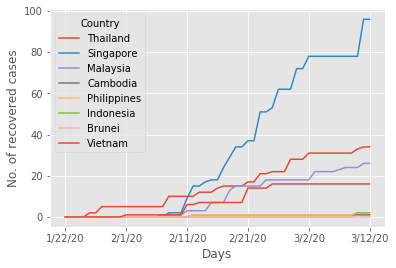

In [81]:
# Plot the number of recovered cases over time for all ASEAN countries:

recovered_cases_asean.T.plot()
plt.ylabel('No. of recovered cases')
plt.xlabel('Days')
plt.show()

In [ ]:
# COMMENT: Singapore continues to lead in terms of the number of patients who recovered from covid-19.
# Thailand is second in recovery, while Malaysia is in 3rd place.

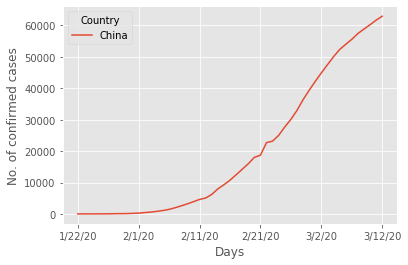

In [82]:
# Plot the number of recovered cases over time for China:

recovered_cases_china_combined.T.plot()
plt.ylabel('No. of confirmed cases')
plt.xlabel('Days')
plt.show()

In [ ]:
# COMMENT: Despite the huge number of confirmed cases at 80k, the number of patients who recovered is also increasing rapidly at 60k people.

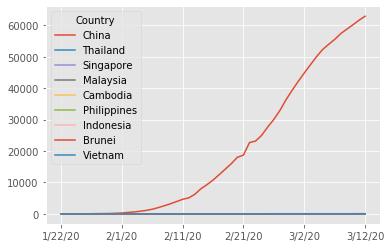

In [83]:
# Plot the number of recovered cases over time for China vs ASEAN countries:

ax = recovered_cases_china_combined.T.plot()
recovered_cases_asean.T.plot(ax=ax)

In [84]:
# COMMENT: China recovery is increasing since they have the most case, while ASEAN countries are seen recovering as well but ASEAN cases are lower compared to China.

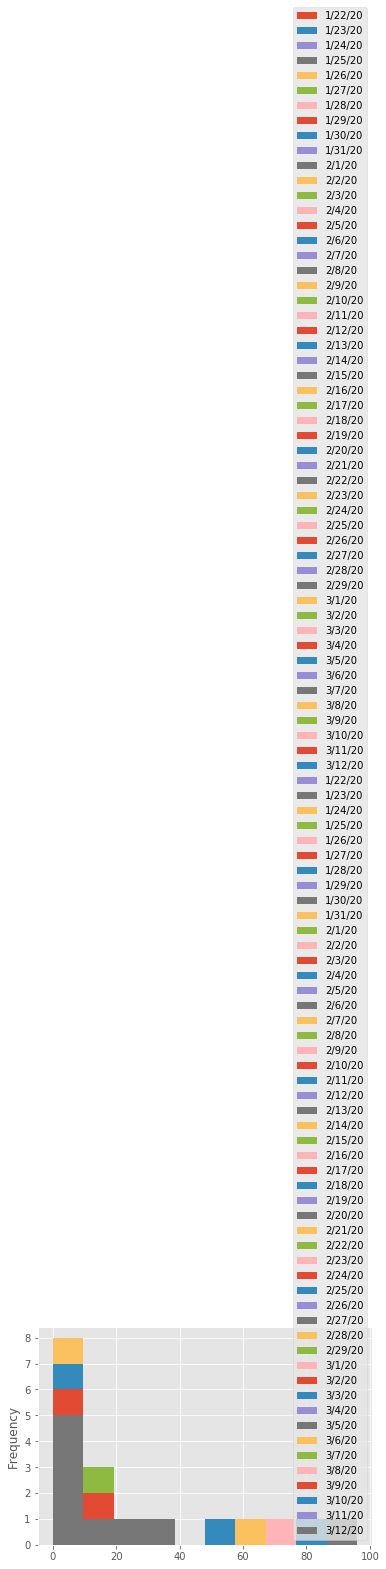

In [139]:
### =============================== ###
### COMPARISON OF DEATH vs RECOVERED
### =============================== ###

# For ASEAN countries:

ax = death_cases_asean.plot(kind='hist')
recovered_cases_asean.plot(kind='hist', ax=ax)

In [138]:
recovered_cases_asean

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
Country,,,,,,,,,,,,,,,,,,,,,
Thailand,0,0,0,0,2,2,5,5,5,5,...,31,31,31,31,31,31,31,33,34,34
Singapore,0,0,0,0,0,0,0,0,0,0,...,78,78,78,78,78,78,78,78,96,96
Malaysia,0,0,0,0,0,0,0,0,0,0,...,22,22,22,22,23,24,24,24,26,26
Cambodia,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Philippines,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,2,2,2
Indonesia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2
Brunei,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Vietnam,0,0,0,0,0,0,0,0,0,0,...,16,16,16,16,16,16,16,16,16,16


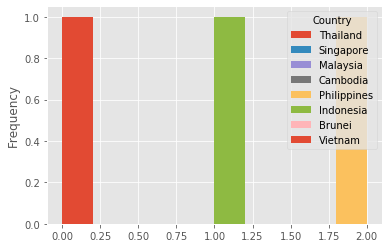

In [134]:
death_cases_asean.transpose()[-1:].plot(kind='hist')

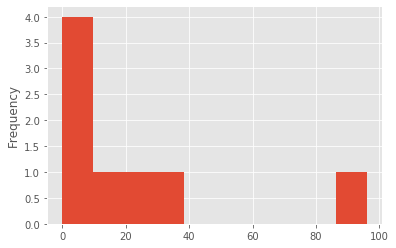

In [136]:
recovered_cases_asean.transpose()[-1:].unstack().plot(kind='hist')